**k-평균 알고리즘**<br>
1. 무작위로 k개의 클러스터 중심 정하기
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심 변경
4. 중심에 변화가 없을 때까지 2~3번 반복<br>
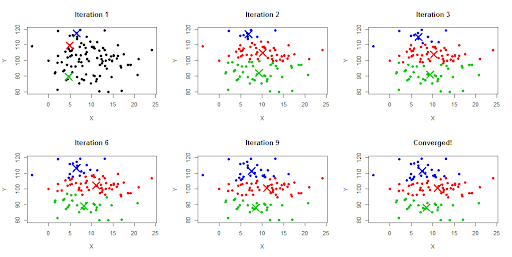

클러스터 중심 = 센트로이드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [ ]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_) #각 샘플이 몇 번째 클래스(레이블)에 속하는지
print(np.unique(km.labels_, return_counts=True))

In [ ]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')

  plt.show()

In [ ]:
n_label = int(input()) #0,1,2
draw_fruits(fruits[km.labels_==n_label])

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)                    #최종적으로 찾은 클러스터 중심

In [ ]:
print(km.transform(fruits_2d[100:101])) #100번째 과일에서 각 센트로이드까지의 거리
print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])

In [ ]:
print(km.n_iter_) #k-평균 알고리즘의 반복 횟수

4


**최적의 k 찾기: 엘보우**<br>
이너셔: $\sum(클러스터\:중심과\:클러스터에\:속한\:샘플\:사이의\:거리)^2$<br>
클러스터 개수가 늘어나면 각 클러스터의 크기는 줄어드므로 이너셔도 줄어듬<br>
클러스터 개수를 늘려가면서 이너셔의 감소 속도가 줄어드는 지점 찾기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

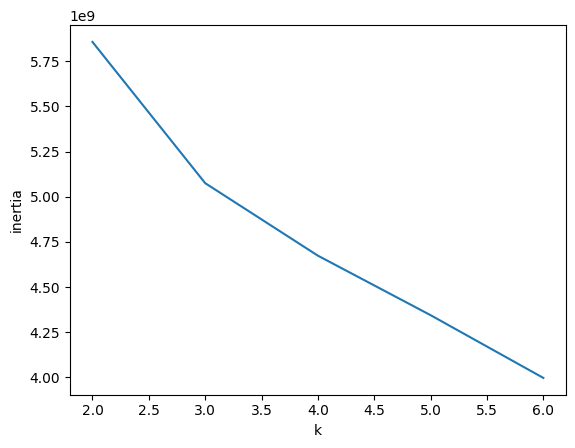

In [ ]:
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()